# Correlation

## Feature and Target Names
<table align="left">
    <tr>
        <th>Independent Variables (X)</th>
        <th>Dependent Variable (y)</th>
    <tr>
    <tr>
        <td>Features</td>
        <td>Target</td>
    </tr>
    <tr>
        <td>Regressors</td>
        <td>Regressand</td>
    </tr>
    <tr>
        <td>Predictors</td>
        <td>Response</td>
    </tr>
    <tr>
        <td>Observations</td>
        <td>Outcomes</td>
    </tr>
    <tr>
        <td>Explanatory</td>
        <td>Labels</td>
    </tr>
    <tr>
        <td>Input</td>
        <td>Output</td>
    </tr>
    <tr>
        <td>exog (exogenous)</td>
        <td>endog (endogenous)</td>
    </tr>
</table>

## Correlation

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related. Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase... Correlations are useful because they can indicate a predictive relationship that can be exploited in practice (paras. 1 - 2).

https://en.wikipedia.org/wiki/Correlation.

### Correlation Between Features

* anything above .9 do something about it
* between .5 and .7 may need a closer look

Correlation does not imply cause causation. Warm days on the beach, ice cream, and shark bites.

### Pearson’s r (correlation coefficient)

$\rho_{x,y} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

* Shows linear relationship between two continuous variables
* How one variable changes as another variable changes
* Measures both strength and direction
* Zero shows no relationship
* Range: -1 to 1
* Anything above abs(.9) do something about it
* Between abs(.5) and abs(.7) needs a closer look

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php<br />
https://www.mygreatlearning.com/blog/covariance-vs-correlation/

### Covariance

$cov(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$

* Shows how variables change together
* A measure of correlation
* Measures direction
* Positive covariance shows variables move up or down, together
* Negative covariance shows variables move inversely
* Near zero covariance indicates no relationship
* Range: -inf to +inf

Readings

* https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/covariance/
* https://towardsdatascience.com/statistics-in-python-understanding-variance-covariance-and-correlation-4729b528db01


data1: mean: 100.77624952319204, std: 19.620082678644234
noise: mean: 50.27325443394578, std: 10.300374282169575
data2: mean: 151.0495039571378, std: 22.35798918770594
covariance: [385.33297729 389.7545618  389.7545618  500.38006058]
Pearsons r: 0.887611908579531, p: 0.0


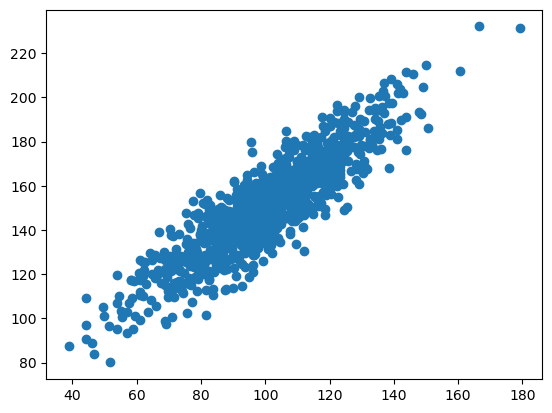

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(1)

# data1 has a mean around 100 and a std of 20
# data2 Gaussian noise with a mean around 50 and a std of 10 added to data1
data1 = 20 * np.random.randn(1000) + 100
noise = 10 * np.random.randn(1000) + 50
data2 = data1 + noise
print(f'data1: mean: {np.mean(data1)}, std: {np.std(data1)}')
print(f'noise: mean: {np.mean(noise)}, std: {np.std(noise)}')
print(f'data2: mean: {np.mean(data2)}, std: {np.std(data2)}')

print(f'covariance: {np.cov(data1, data2).flatten()}')

corr, p = pearsonr(data1, data2)
print(f'Pearsons r: {corr}, p: {p}')

plt.scatter(data1, data2)
plt.show()

data1: mean: 100.77624952319204, std: 19.620082678644234
data2: noise: 50.27325443394578, std: 10.300374282169575
covariance: [385.33297729   4.42158451   4.42158451 106.20391427]
Pearsons r: 0.02185695102804923, p: 0.48994551602659053


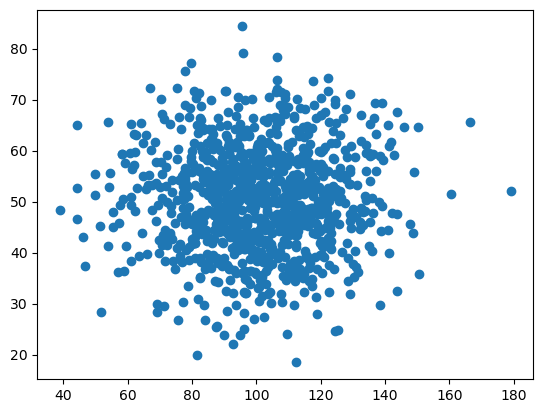

In [ ]:
# data1 and noise relationship?
print(f'data1: mean: {np.mean(data1)}, std: {np.std(data1)}')
print(f'data2: noise: {np.mean(noise)}, std: {np.std(noise)}')

print(f'covariance: {np.cov(data1, noise).flatten()}')

corr, p = pearsonr(data1, noise)
print(f'Pearsons r: {corr}, p: {p}')

plt.scatter(data1, noise)
plt.show()

data1: mean: -0.022168571602133418, std: 0.9716231299281457
data2: mean: 0.0035987194479391764, std: 1.0087442296698754
covariance: [0.9449965  0.03096371 0.03096371 1.0185835 ]
Pearsons r: 0.03156018634247254, p: 0.3187543941370932


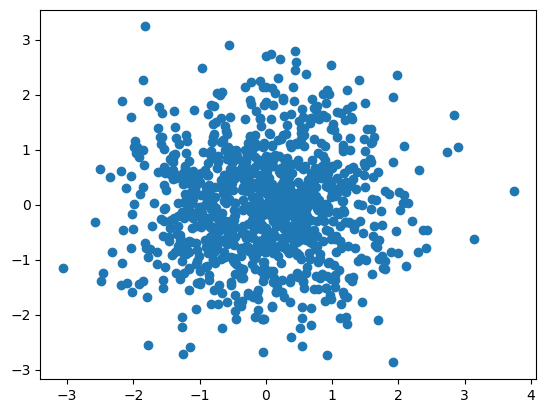

In [ ]:
# uncorrelated datasets
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)
print(f'data1: mean: {np.mean(data1)}, std: {np.std(data1)}')
print(f'data2: mean: {np.mean(data2)}, std: {np.std(data2)}')

print(f'covariance: {np.cov(data1, data2).flatten()}')

corr, p = pearsonr(data1, data2)
print(f'Pearsons r: {corr}, p: {p}')

plt.scatter(data1, data2)
plt.show()

### Multicollinearity

* Makes it difficult to determine which independent variables are influencing the dependent variable
* If you want inference, multicollinearity is problematic.
* But if you want prediction accuracy, there is no problem of overlapping explaination of data as long as the correlation between the predictors doesn't change. The problem from the correlated predictors is more on the side of expected test error (MSE)

https://stats.stackexchange.com/questions/225945/multiple-linear-regression-with-multicollinearity-residual-regression

### Correlation vs Multicollinearity

* Correlation measures how two or more variables move together (good between independent and dependent variables)
* (Mutli)collinearity shows a linear relationship, usually high, between features

### Variance Inflation Factor (VIF)

https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

* Minimum possible value is one
* Values over 10 mean multicollinearity

### Confounding Variables

* In statistics, a confounder (also confounding variable, confounding factor, extraneous determinant or lurking variable) is a variable that influences both the dependent variable and independent variable, causing a spurious association. Confounding is a causal concept, and as such, cannot be described in terms of correlations or associations.

https://en.wikipedia.org/wiki/Confounding

Do ice cream sales correlate with shark bites?

### Instrumental Variables

* In statistics, econometrics, epidemiology and related disciplines, the method of instrumental variables (IV) is used to estimate causal relationships when controlled experiments are not feasible or when a treatment is not successfully delivered to every unit in a randomized experiment.

https://en.wikipedia.org/wiki/Instrumental_variables_estimation

IVs have had their primary application in economics but in the health field have been used to study quality of care. The key difference between confounding variables and IVs is that IVs do not directly influence the outcome variable whereas confounding variables do.

https://www.statisticshowto.com/instrumental-variable/

For example, an unpopular law was passed in the capital and the protest size was small due to it raining pretty hard. There is no correlation between the rain and the unpopular law but there is a strong correlation with the rain and the size of the protest, so the relationship between the rain and the unpopular law is due to protest size. Chris Alton

### Lurking Variable

https://www.statisticshowto.com/lurking-variable/

### Endogeneity

In a variety of contexts endogeneity is the property of being influenced within a system.

https://en.wikipedia.org/wiki/Endogeneity

### Anscombes Quartet

* Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed.

https://en.wikipedia.org/wiki/Anscombe's_quartet

### Simpson's Paradox

* Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined.

https://en.wikipedia.org/wiki/Simpson's_paradox

### Spurious Correlation

In statistics, a spurious relationship or spurious correlation is a mathematical relationship in which two or more events or variables are associated but not causally related, due to either coincidence or the presence of a certain third, unseen factor.

https://en.wikipedia.org/wiki/Spurious_relationship

### Canonical Correlation

https://towardsdatascience.com/canonical-correlation-analysis-b1a38847219d

## Multicollinearity


**Multicollinearity** is a high linear correlation among two or more independent variables (features) in a multiple regression model. While often seen as a problem, its impact depends on what you are trying to achieve with your model.

### 1. Severity Matters: Assess the Degree of Correlation

The problems caused by multicollinearity—such as unstable coefficient estimates and inflated standard errors—**increase with the degree of the correlation**.

* **High Severity (e.g., $r > 0.9$):** This usually requires attention because the coefficients become highly unreliable.
* **Moderate Severity (e.g., $r$ between $0.7$ and $0.9$):** In some fields, this level may be tolerated if the model's overall predictive power is good, or if the variables of interest are not affected. If you have only moderate multicollinearity, you may not need to resolve it.

### 2. Focus on Variables of Interest

Multicollinearity only affects the specific **independent variables that are correlated** with each other.

* If your model contains experimental variables of interest and control variables, and **high multicollinearity exists only among the control variables** but not the experimental ones, you can still confidently interpret the coefficients and $p$-values for your experimental variables.
* The effects are localized. If multicollinearity is not present for the independent variables you are **particularly interested in**, you may not need to resolve it.

### 3. Goal of the Analysis: Prediction vs. Inference

The most crucial factor is your model's primary goal. Multicollinearity harms **inference** (understanding causes) but not **prediction**.

| If Your Goal Is... | Effect of Multicollinearity | Conclusion |
| :--- | :--- | :--- |
| **Inference/Explanation** (Understanding the role of each $X$) | Affects the **coefficients** and **$p$-values**, making them unstable and hard to interpret. | **You must reduce** severe multicollinearity to trust your conclusions. |
| **Prediction/Forecasting** (Minimizing prediction error) | **Does not influence the predictions**, the precision of the predictions, or the goodness-of-fit statistics ($\text{R}^2$). | **You don't need to reduce** severe multicollinearity if your primary goal is accurate forecasting. |

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

In [ ]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/mariokart.csv', index_col=0)

# delete constant quasi constant variables
df.drop(['Luigi', 'Baby Mario', 'Birdo'], axis=1, inplace=True)

# impute missing values with mean, median, and mode
df['Toad'].fillna(round(df['Toad'].mean(), 2), inplace=True)
df['Koopa Troopa'].fillna(round(df['Koopa Troopa'].mean(), 2), inplace=True)
df['Bowser'].fillna(round(df['Bowser'].mean(), 2), inplace=True)
df['Donkey Kong'].fillna(df['Donkey Kong'].median(), inplace=True)
df['Princess Peach'].fillna(df['Princess Peach'].median(), inplace=True)
df['Isabelle'].fillna(df['Isabelle'].median(), inplace=True)
df['Wario'].fillna(df['Wario'].mode()[0], inplace=True)

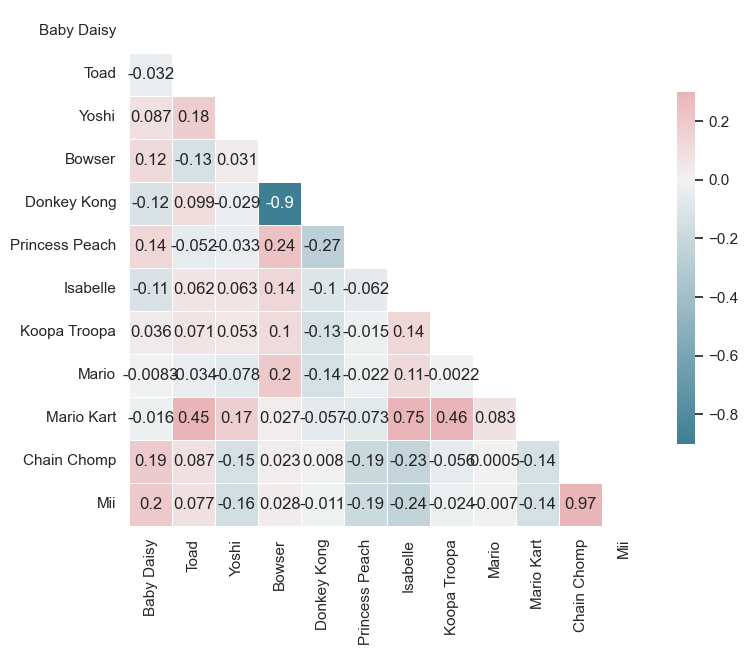

In [ ]:
# correlation heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df_get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

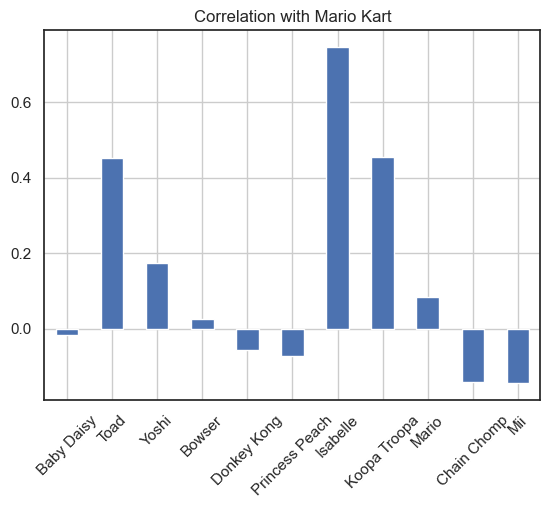

In [ ]:
# correlation with target
df.drop('Mario Kart', axis=1).corrwith(df['Mario Kart']).plot.bar(
        title = 'Correlation with Mario Kart', rot = 45, grid = True);

### Variance Inflation Factor

In statistics, the variance inflation factor (VIF) is the ratio (quotient) of the variance of estimating some parameter in a model that includes multiple other terms (parameters) by the variance of a model constructed using only one term. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

https://en.wikipedia.org/wiki/Variance_inflation_factor

In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Baby Daisy,1.142644
2,Toad,1.973726
3,Yoshi,1.122872
4,Bowser,6.005870
5,Donkey Kong,5.742497
6,Princess Peach,1.189324
7,Isabelle,4.259381
8,Koopa Troopa,1.796536
9,Mario,1.082224
10,Mario Kart,6.516925


### Interpret VIF

* A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model
* A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention
* A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model

https://www.statology.org/how-to-calculate-vif-in-python/

### Standardizing Data

* If p-values are low but VIF is high, try standardizing (centering the data)

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

### Correlation with Code

In [ ]:
# code the correlated relationships
import numpy as np

corrs = X.corr()

# get max of each column and row location
for i in range(len(corrs.columns)):
    for j in range(i):
        if abs(corrs.iloc[i, j]) > .5:
            print(f'{corrs.columns[i]} and {corrs.columns[j]}: {abs(corrs.iloc[i, j])}')

corrs

Donkey Kong and Bowser: 0.9002748872874804
Mario Kart and Isabelle: 0.7458485839149187
Mii and Chain Chomp: 0.9725634488464845


,Baby Daisy,Toad,Yoshi,Bowser,Donkey Kong,Princess Peach,Isabelle,Koopa Troopa,Mario,Mario Kart,Chain Chomp,Mii
Baby Daisy,1.000000,-0.032398,0.087362,0.120246,-0.115531,0.137782,-0.113458,0.035764,-0.008337,-0.016011,0.189586,0.197915
Toad,-0.032398,1.000000,0.181907,-0.133556,0.098731,-0.052490,0.061860,0.070882,-0.034350,0.451398,0.087053,0.077317
Yoshi,0.087362,0.181907,1.000000,0.031494,-0.028594,-0.032643,0.063348,0.053201,-0.078464,0.172769,-0.149085,-0.157607
Bowser,0.120246,-0.133556,0.031494,1.000000,-0.900275,0.235890,0.139694,0.104966,0.199486,0.026710,0.022928,0.028320
Donkey Kong,-0.115531,0.098731,-0.028594,-0.900275,1.000000,-0.266460,-0.102437,-0.132413,-0.143051,-0.057293,0.007981,-0.010917
Princess Peach,0.137782,-0.052490,-0.032643,0.235890,-0.266460,1.000000,-0.061734,-0.015114,-0.021988,-0.072977,-0.193176,-0.186142
Isabelle,-0.113458,0.061860,0.063348,0.139694,-0.102437,-0.061734,1.000000,0.136872,0.114455,0.745849,-0.229486,-0.237225
Koopa Troopa,0.035764,0.070882,0.053201,0.104966,-0.132413,-0.015114,0.136872,1.000000,-0.002180,0.455236,-0.056121,-0.023770
Mario,-0.008337,-0.034350,-0.078464,0.199486,-0.143051,-0.021988,0.114455,-0.002180,1.000000,0.082960,0.000499,-0.007033
Mario Kart,-0.016011,0.451398,0.172769,0.026710,-0.057293,-0.072977,0.745849,0.455236,0.082960,1.000000,-0.142272,-0.144046


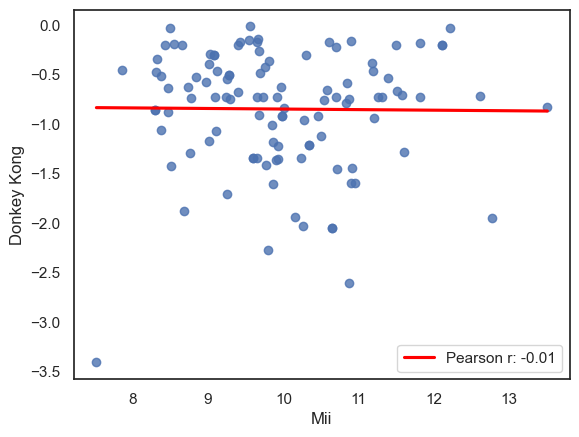

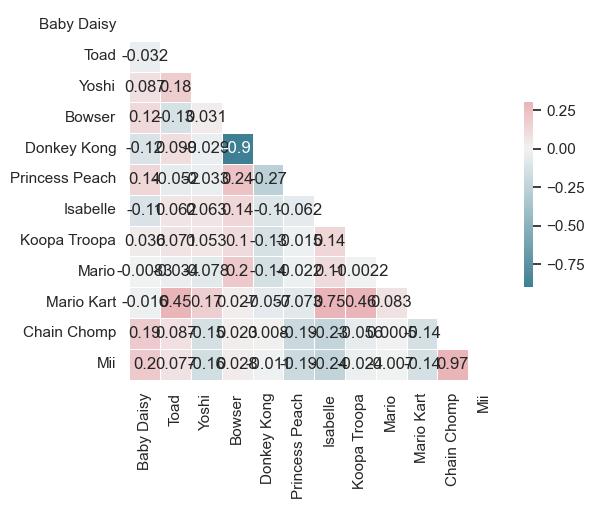

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats

ptext = f"Pearson r: {round(stats.pearsonr(X['Mii'], X['Donkey Kong'])[0], 2)}"
sns.regplot(x='Mii', y='Donkey Kong', data=X, ci=None,
            line_kws={'color': 'red', 'label': ptext});

plt.legend()
plt.show();

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots()

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [ ]:
X.drop(['Mii'], axis=1, inplace=True)

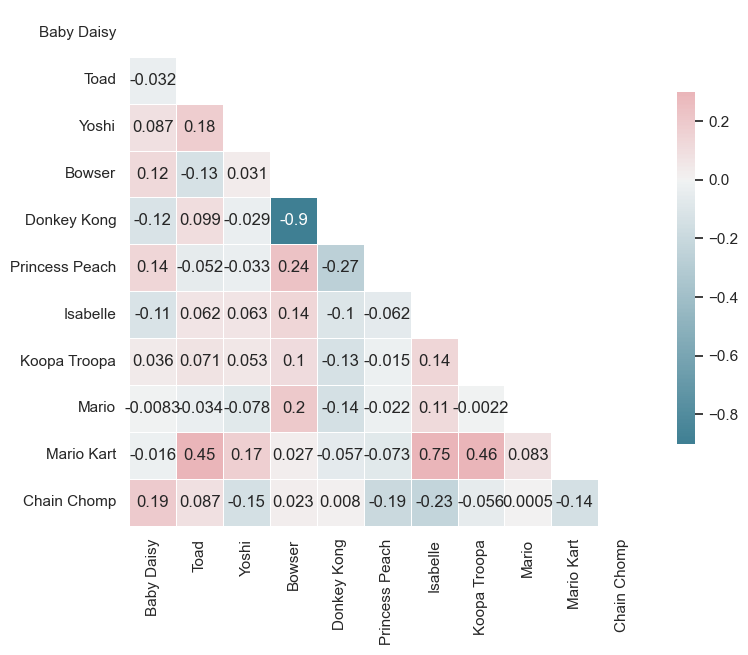

In [ ]:
# correlation heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

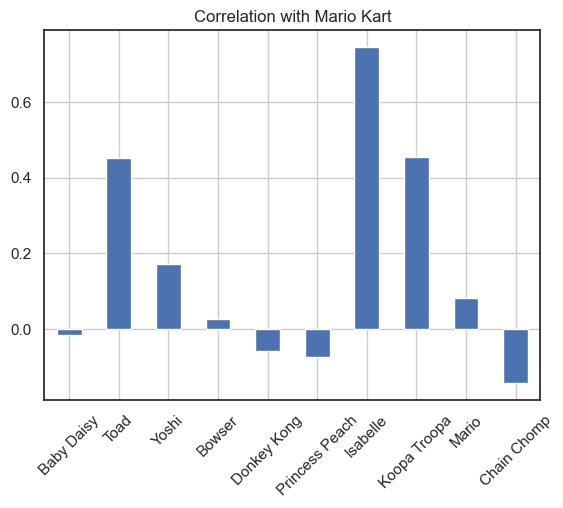

In [ ]:
# correlation with target
X.drop('Mario Kart', axis=1).corrwith(X['Mario Kart']).plot.bar(
        title = 'Correlation with Mario Kart', rot = 45, grid = True);

In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Baby Daisy,1.142644
2,Toad,1.973726
3,Yoshi,1.122872
4,Bowser,6.005870
5,Donkey Kong,5.742497
6,Princess Peach,1.189324
7,Isabelle,4.259381
8,Koopa Troopa,1.796536
9,Mario,1.082224
10,Mario Kart,6.516925


In [ ]:
X.drop(['Donkey Kong'], axis=1, inplace=True)

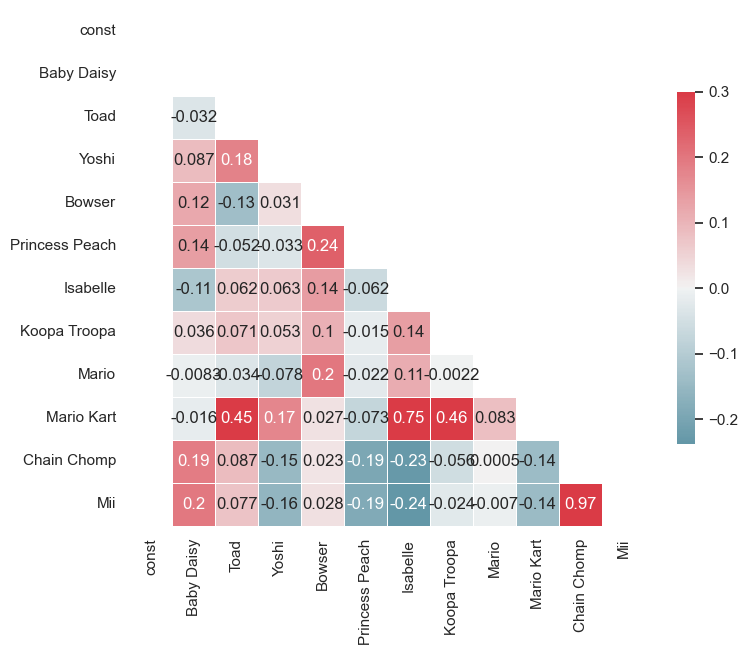

In [ ]:
# correlation heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

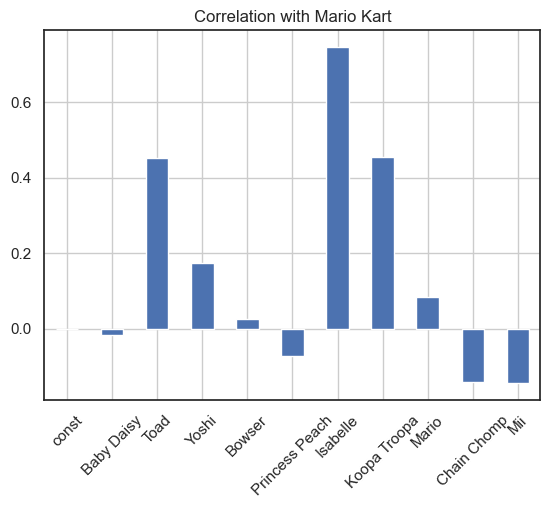

In [ ]:
# correlation with target
X.drop('Mario Kart', axis=1).corrwith(X['Mario Kart']).plot.bar(
        title = 'Correlation with Mario Kart', rot = 45, grid = True);

## Engineering a Solution

In [ ]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/mariokart.csv', index_col=0)

# delete constant quasi constant variables
df.drop(['Luigi', 'Baby Mario', 'Birdo'], axis=1, inplace=True)

# impute missing values with mean, median, and mode
df['Toad'].fillna(round(df['Toad'].mean(), 2), inplace=True)
df['Koopa Troopa'].fillna(round(df['Koopa Troopa'].mean(), 2), inplace=True)
df['Bowser'].fillna(round(df['Bowser'].mean(), 2), inplace=True)
df['Donkey Kong'].fillna(df['Donkey Kong'].median(), inplace=True)
df['Princess Peach'].fillna(df['Princess Peach'].median(), inplace=True)
df['Isabelle'].fillna(df['Isabelle'].median(), inplace=True)
df['Wario'].fillna(df['Wario'].mode()[0], inplace=True)
df.isnull().sum()

Baby Daisy        0
Toad              0
Yoshi             0
Bowser            0
Donkey Kong       0
Princess Peach    0
Isabelle          0
Koopa Troopa      0
Mario             0
Wario             0
Mario Kart        0
Cat Peach         0
King Boo          0
Inkling           0
Chain Chomp       0
Mii               0
dtype: int64

In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Baby Daisy,1.142644
2,Toad,1.973726
3,Yoshi,1.122872
4,Bowser,6.005870
5,Donkey Kong,5.742497
6,Princess Peach,1.189324
7,Isabelle,4.259381
8,Koopa Troopa,1.796536
9,Mario,1.082224
10,Mario Kart,6.516925


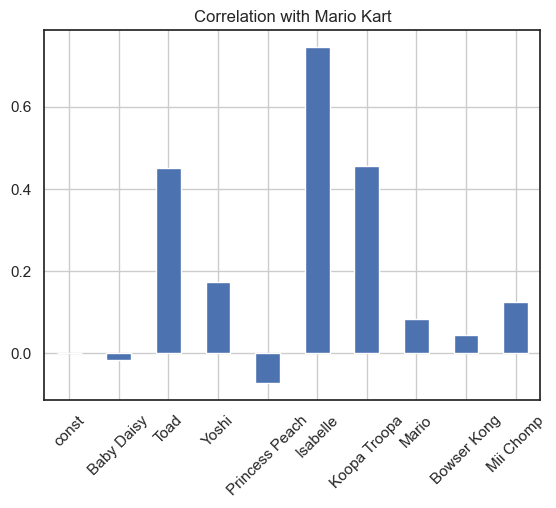

In [ ]:
X['Bowser Kong'] = X['Bowser'] - X['Donkey Kong']
X['Mii Chomp'] = X['Mii'] - X['Chain Chomp']
X.drop(['Donkey Kong', 'Bowser', 'Mii', 'Chain Chomp'], axis=1, inplace=True)

X.drop('Mario Kart', axis=1).corrwith(X['Mario Kart']).plot.bar(
        title = 'Correlation with Mario Kart', rot = 45, grid = True);